# Adding Dependences

In [2]:
using DelimitedFiles
using Images
using Plots

# Extract Matrix From Image

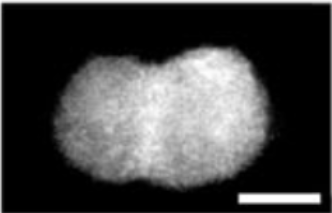

In [3]:
img = load("2.png")

## Extracting the grayscale on the image

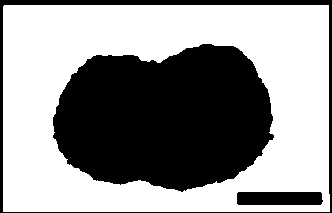

In [4]:
img_channel = Gray.(.!(Gray.(img) .> 0.1))
# img_channel =Gray.(Gray_img)

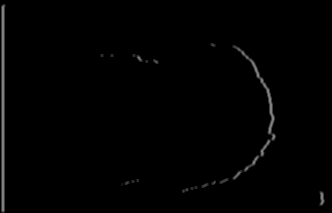

In [5]:
krnl_h = centered(Gray{Float32}[0 -1 -1 -1 0; 0 -1 -1 -1 0; 0 0 0 0 0; 0 1 1 1 0; 0 1 1 1 0]./12)
grad_h = imfilter(img_channel, krnl_h')

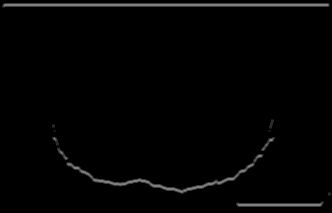

In [6]:
krnl_v = centered(Gray{Float32}[0 0 0 0 0; -1 -1 0 1 1;-1 -1 0 1 1;-1 -1 0 1 1;0 0 0 0 0 ]./12)
grad_v = imfilter(img_channel, krnl_v')

# Extracting the Contour on the image

In [7]:
# reduce = 10
# Gray_img_contour = abs.(Gray_img - circshift(Gray_img,2))
# Gray_img_contour = Gray_img_contour[reduce:size(Gray_img_contour)[1]-reduce,:]
# Gray.(Gray_img_contour)

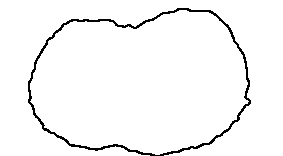

In [24]:
reduce = [36,22,25,25] # [up,down,left,right]
final_img = (grad_h.^2) .+ (grad_v.^2)
final_img = Gray.(.!(Gray.(final_img) .> 0.1))
final_img = final_img[reduce[1]:size(final_img)[1]-reduce[2],reduce[3]:size(final_img)[2]-reduce[4]]

# Extracting the index of each point

In [96]:
# idx = CartesianIndices(size(Gray_img_contour))[Gray_img_contour .== 1]
# arr_idx = hcat(getindex.(idx,2),getindex.(idx,1))

In [25]:
idx = CartesianIndices(size(final_img))[final_img .== 0]
arr_idx = hcat(getindex.(idx,2),getindex.(idx,1))

1461×2 Matrix{Int64}:
  29   82
  29   83
  29   84
  29   85
  29   86
  29   87
  29   88
  29   89
  29   90
  29   91
   ⋮  
 250  101
 250  102
 250  103
 250  104
 250  105
 251  101
 251  102
 251  103
 251  104

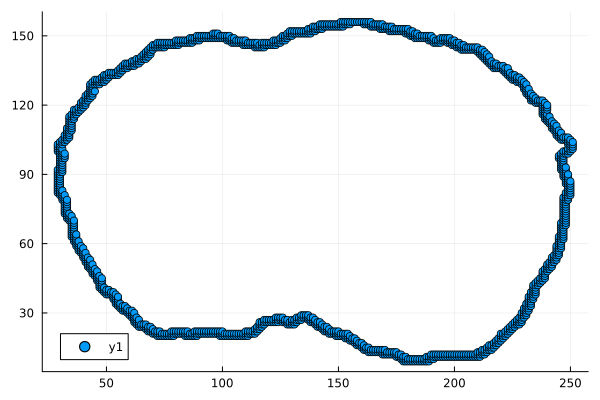

In [34]:
plot(arr_idx[:,1], arr_idx[:,2], seriestype = :scatter)

# Center of Mass

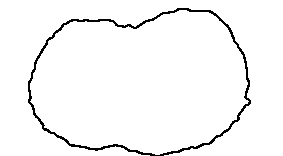

In [35]:
final_img

In [43]:
center_of_mass = sum(arr_idx, dims=1)/size(arr_idx,1)

1×2 Matrix{Float64}:
 141.07  83.449

# Putting the index in the center of mass

In [44]:
center_idx = arr_idx - repeat(center_of_mass, size(arr_idx, 1))

1461×2 Matrix{Float64}:
 -112.07  -1.44901
 -112.07  -0.449008
 -112.07   0.550992
 -112.07   1.55099
 -112.07   2.55099
 -112.07   3.55099
 -112.07   4.55099
 -112.07   5.55099
 -112.07   6.55099
 -112.07   7.55099
    ⋮     
  108.93  17.551
  108.93  18.551
  108.93  19.551
  108.93  20.551
  108.93  21.551
  109.93  17.551
  109.93  18.551
  109.93  19.551
  109.93  20.551

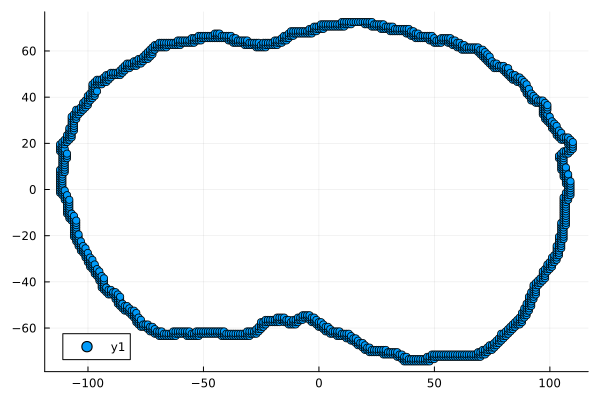

In [45]:
plot(center_idx[:,1], center_idx[:,2], seriestype = :scatter)

## Cilindrical Coordinates

In [46]:
r = sqrt.(sum(center_idx .^ 2, dims=2))
θ = 180/pi .* (atan.(center_idx[:,2] ./ center_idx[:,1]) + pi*[center_idx[:,2] .< 0][1]) .+ 90
center_idx_cil_coord = hcat(θ,r)

1461×2 Matrix{Float64}:
 270.741   112.08
 270.23    112.071
  89.7183  112.072
  89.2071  112.081
  88.696   112.1
  88.1852  112.127
  87.6746  112.163
  87.1644  112.208
  86.6546  112.262
  86.1454  112.325
   ⋮       
  99.153   110.334
  99.6649  110.498
 100.175   110.67
 100.684   110.851
 101.191   111.041
  99.0711  111.322
  99.5786  111.484
 100.085   111.655
 100.589   111.834

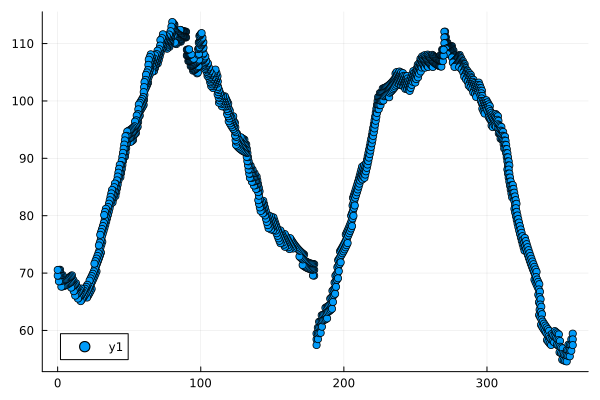

In [47]:
plot(center_idx_cil_coord[:,1], center_idx_cil_coord[:,2], seriestype = :scatter)

In [48]:
findmin(center_idx_cil_coord[:,1])

(0.057254070585074146, 736)

In [49]:
findmax(center_idx_cil_coord[:,1])

(359.93205385385534, 732)